In [ ]:
import os 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
image_dir_blight = 'data/Blight'
blight_images = [os.path.join(image_dir_blight, img) for img in os.listdir(image_dir_blight)]

image_dir_rust = 'data/Common_Rust'
rust_images = [os.path.join(image_dir_rust, img) for img in os.listdir(image_dir_rust)]

image_dir_gray = 'data/Gray_Leaf_Spot'
gray_images = [os.path.join(image_dir_gray, img) for img in os.listdir(image_dir_gray)]

image_dir_healthy = 'data/Healthy'
healthy_images = [os.path.join(image_dir_healthy, img) for img in os.listdir(image_dir_healthy)]

In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf


try:
    img = tf.keras.utils.load_img(img_path, target_size=(300, 300), color_mode="rgb")
except Exception as e:
    print(f"Failed to process file {img_file}: {e}")
    


TARGET_AUGMENTED_DIR = "data/Gray_Leaf_Spot"
AUGMENTED_DIR = "data/Augmented_gray"

data_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

file_count = 0
for img_file in os.listdir(TARGET_AUGMENTED_DIR):
    img_path = os.path.join(TARGET_AUGMENTED_DIR, img_file)
    
    img = tf.keras.utils.load_img(img_path, target_size=(300, 300), color_mode="rgb")
    x = tf.keras.utils.img_to_array(img)
    x = x.reshape((1,) + x.shape)  

    file_count += 1
    print(f"Processing file #{file_count}: {img_file}")  

    i = 0
    for batch in data_aug.flow(x, batch_size=1, save_to_dir=AUGMENTED_DIR, save_prefix="aug", save_format="jpg"):
        i += 1
        if i >= 1:  
            break
print(f"Total processed files: {file_count}")

KeyboardInterrupt: 

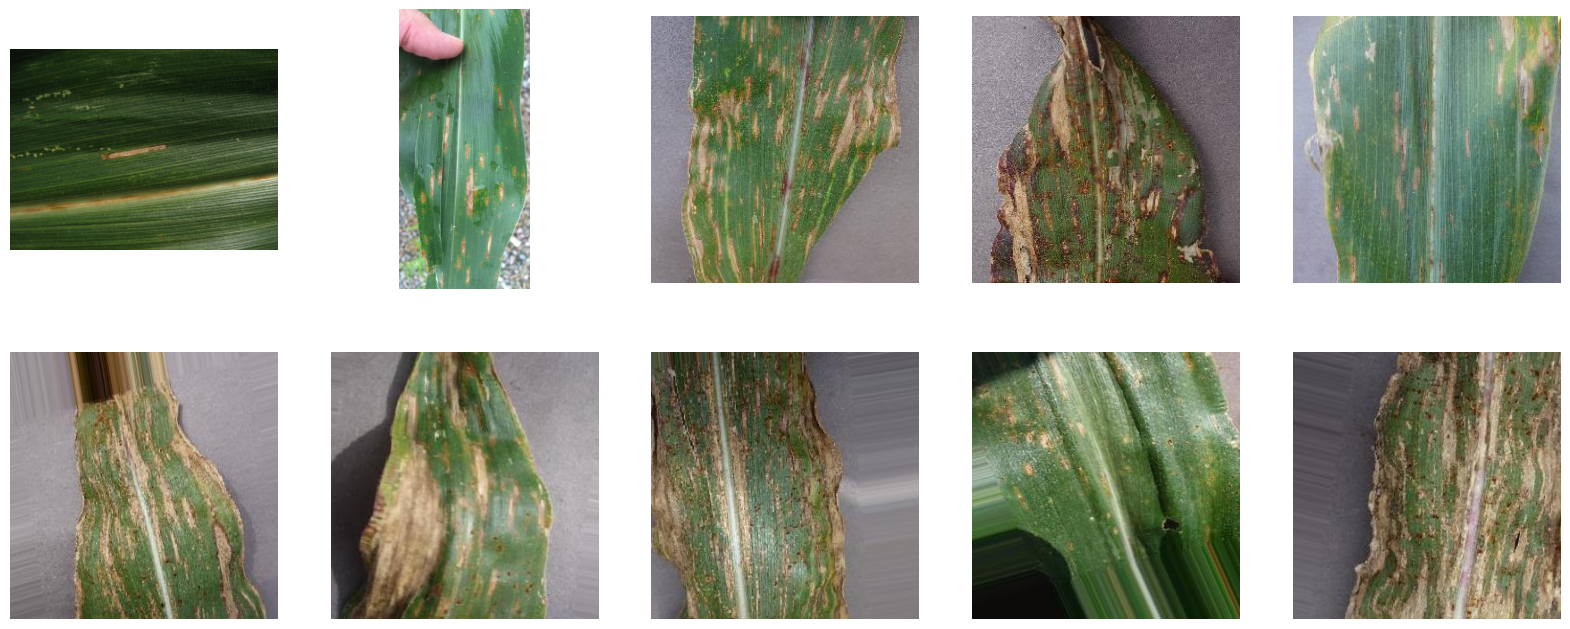

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


TARGET_AUGMENTED_DIR = "data/Gray_Leaf_Spot"
AUGMENTED_DIR = "data/Augmented_gray"


target_images = [
    os.path.join(TARGET_AUGMENTED_DIR, fname)
    for fname in os.listdir(TARGET_AUGMENTED_DIR)
    
][:5]

augmented_images = [
    os.path.join(AUGMENTED_DIR, fname)
    for fname in os.listdir(AUGMENTED_DIR)
    if fname.endswith(valid_extensions)
][:5]


all_images = target_images + augmented_images


nrows = 2  
ncols = max(len(target_images), len(augmented_images))  


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


for i, img_path in enumerate(all_images):
    
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  

    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
DATA_DIR = "data"
def train_val_datasets():
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,            
        batch_size=64,                 
        image_size=(300, 300),      
        label_mode='categorical', 
        color_mode="rgb",  
        validation_split=0.2,      
        subset="training",
        seed=42                      
    )

    
    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,            
        batch_size=64,
        image_size=(300, 300),
        label_mode='categorical',
        color_mode="rgb",
        validation_split=0.2,          
        subset="validation",           
        seed=42                        
    )
    
    return train_dataset, validation_dataset

In [20]:
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")   

Found 4740 files belonging to 4 classes.
Using 3792 files for training.
Found 4740 files belonging to 4 classes.
Using 948 files for validation.
Images of train dataset have shape: (None, 300, 300, 3)
Labels of train dataset have shape: (None, 4)
Images of validation dataset have shape: (None, 300, 300, 3)
Labels of validation dataset have shape: (None, 4)


In [ ]:
# GRADED FUNCTION: create_model
def create_model():
    
    model = tf.keras.models.Sequential([ 
       
        tf.keras.Input(shape=(300, 300, 3)),
        
        
        tf.keras.layers.Rescaling(1./255),
        
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation='softmax')
        ]) 

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

   
    return model

In [22]:
model = create_model()

In [23]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 300, 300, 3)
Output shape: (None, 4)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    43,655,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,675,204 (166.61 MB)

 Trainable params: 43,675,204 (166.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.4189 - loss: 7.3846 - val_accuracy: 0.5728 - val_loss: 1.0043
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7426 - loss: 0.5638 - val_accuracy: 0.6909 - val_loss: 0.9220
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7962 - loss: 0.4300 - val_accuracy: 0.7416 - val_loss: 0.8120
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8343 - loss: 0.3640 - val_accuracy: 0.7743 - val_loss: 0.7161
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8639 - loss: 0.3068 - val_accuracy: 0.8333 - val_loss: 0.5388
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8745 - loss: 0.3004 - val_accuracy: 0.8534 - val_loss: 0.4890
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9018 - loss: 0.2406 - val_accuracy: 0.8418 - val_loss: 0.4656
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9339 - loss: 0.1988 - val_accuracy: 0.8376 - val

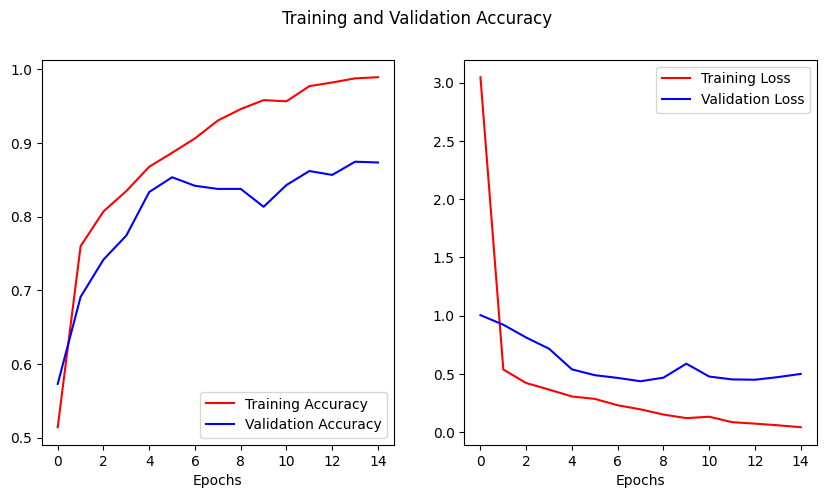

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and Validation Accuracy')


for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('Epochs')

plt.show()